In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os

# Mengatur style plot agar terlihat rapi
sns.set(style="whitegrid")

# --- 0. Muat Dataset ---
file_path = '../Dataset/Bert_Sentimen.csv'
try:
    df = pd.read_csv(file_path)
    print(f"Berhasil memuat {file_path}. Total {len(df)} baris.")
except Exception as e:
    print(f"Gagal memuat file: {e}")
    # Exit if file fails to load
    exit()

Berhasil memuat ../Dataset/Bert_Sentimen.csv. Total 5683 baris.


Membuat Visualisasi #1: Diagram Batang Distribusi Sentimen...


C:\Users\faiqa\AppData\Local\Temp\ipykernel_2576\2065708187.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Plot disimpan ke: distribusi_sentimen_total.png


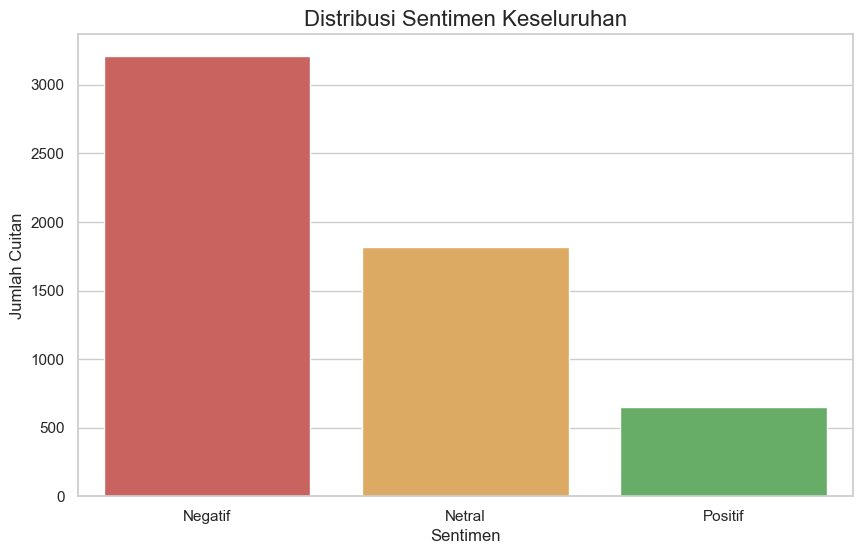

In [2]:
# --- 1. Visualisasi Distribusi Sentimen (Bar Chart) ---
print("Membuat Visualisasi #1: Diagram Batang Distribusi Sentimen...")

# Buat canvas baru
plt.figure(figsize=(10, 6))

# Urutkan bar berdasarkan jumlah (value_counts().index)
sns.countplot(
    data=df,
    x='sentiment_pred',
    # Urutkan bar berdasarkan jumlah (dari terbanyak ke terkecil)
    order=df['sentiment_pred'].value_counts().index,
    # Beri warna spesifik untuk tiap sentimen
    palette={'Negatif': '#d9534f', 'Netral': '#f0ad4e', 'Positif': '#5cb85c'}
)
plt.title('Distribusi Sentimen Keseluruhan', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Cuitan', fontsize=12)

# Simpan plot
plot_file_1 = 'distribusi_sentimen_total.png'
plt.savefig(plot_file_1, dpi=300, bbox_inches='tight')
print(f"Plot disimpan ke: {plot_file_1}")
plt.show() # Tampilkan plot
plt.close() # Tutup plot agar tidak tumpang tindih


Membuat Visualisasi #2: Word Clouds per Sentimen...
Membuat word cloud untuk sentimen: Negatif
Plot disimpan ke: wordcloud_sentimen_negatif.png


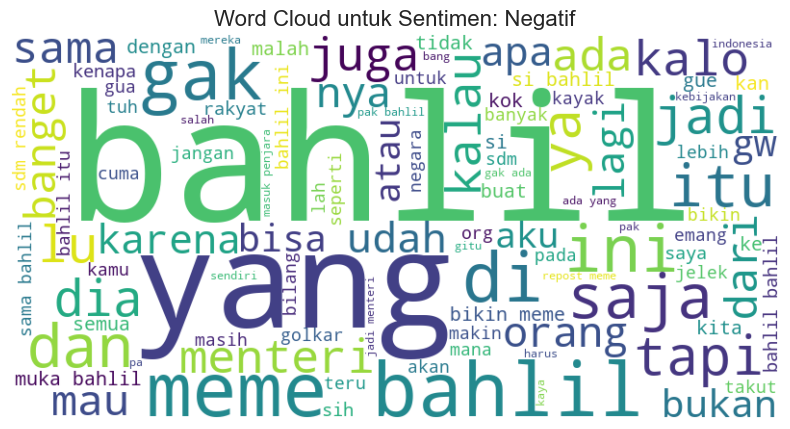

Membuat word cloud untuk sentimen: Netral
Plot disimpan ke: wordcloud_sentimen_netral.png


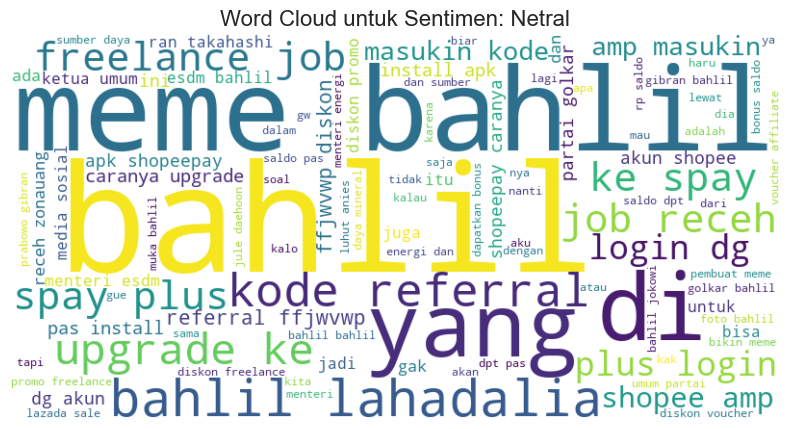

Membuat word cloud untuk sentimen: Positif
Plot disimpan ke: wordcloud_sentimen_positif.png


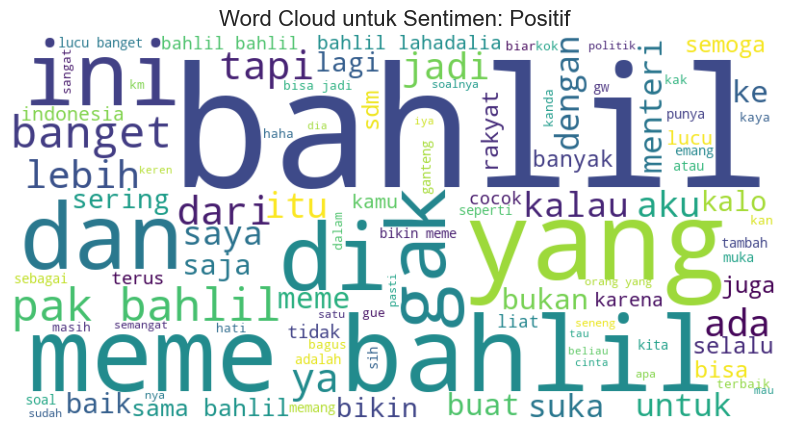

In [3]:
# --- 2. Visualisasi Word Clouds per Sentimen ---
print("\nMembuat Visualisasi #2: Word Clouds per Sentimen...")

# Pastikan kolom teks bersih dari nilai non-string (NaN)
df['normalized_text'] = df['normalized_text'].fillna('')

# Dapatkan label sentimen unik (Negatif, Netral, Positif)
sentiments = df['sentiment_pred'].unique()

for sentiment in sentiments:
    if sentiment is None or pd.isna(sentiment):
        continue

    print(f"Membuat word cloud untuk sentimen: {sentiment}")

    # Gabungkan semua teks untuk sentimen ini
    text = ' '.join(df[df['sentiment_pred'] == sentiment]['normalized_text'])

    if text.strip(): # Hanya buat jika ada teks
        try:
            wordcloud = WordCloud(
                width=800,
                height=400,
                background_color='white',
                colormap='viridis',
                max_words=100
            ).generate(text)

            plt.figure(figsize=(10, 5))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'Word Cloud untuk Sentimen: {sentiment}', fontsize=16)

            # Simpan plot
            plot_file_2 = f'wordcloud_sentimen_{str(sentiment).lower()}.png'
            plt.savefig(plot_file_2, dpi=300, bbox_inches='tight')
            print(f"Plot disimpan ke: {plot_file_2}")
            plt.show() # Tampilkan plot
            plt.close()

        except ValueError as e:
            print(f"Gagal membuat word cloud untuk '{sentiment}': {e}")

    else:
        print(f"Tidak ada teks untuk sentimen '{sentiment}', word cloud dilewati.")


Membuat Visualisasi #3: Diagram Batang Sentimen per Topik...
Plot disimpan ke: distribusi_sentimen_per_topik.png


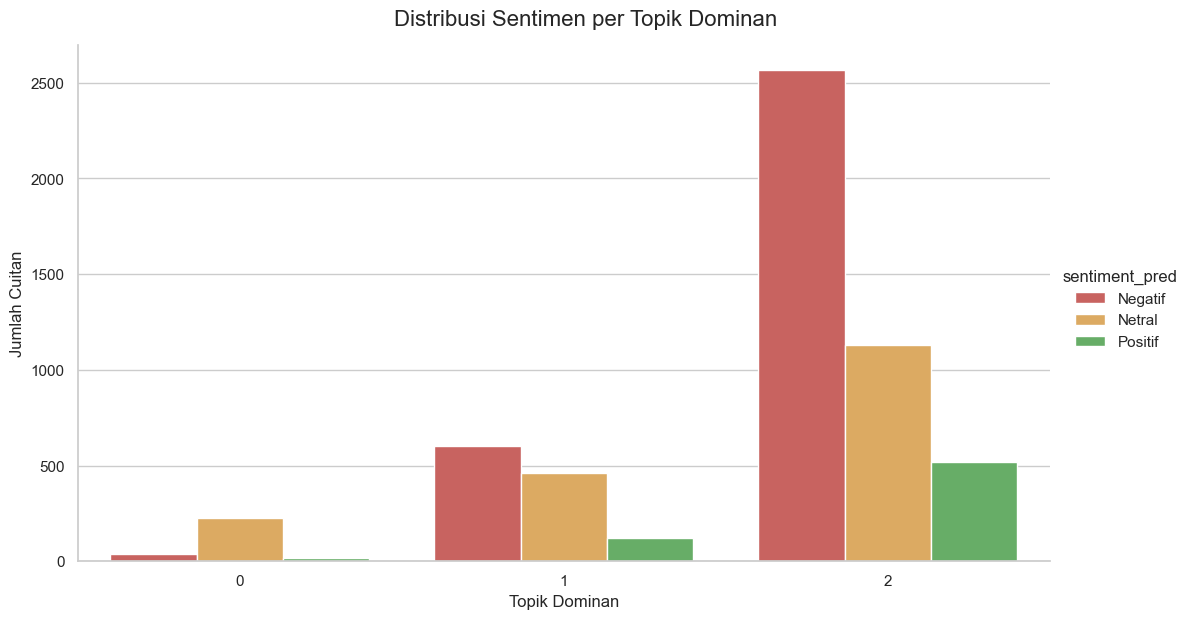

In [4]:
# --- 3. Visualisasi Distribusi Sentimen per Topik ---
print("\nMembuat Visualisasi #3: Diagram Batang Sentimen per Topik...")

# Cek apakah 'dominant_topic' ada
if 'dominant_topic' in df.columns:

    # Ubah kolom topik menjadi kategorikal agar urutannya benar di plot
    df['dominant_topic'] = df['dominant_topic'].astype('category')

    # Menggunakan seaborn.catplot untuk membuat grouped bar chart
    g = sns.catplot(
        data=df,
        x='dominant_topic',
        kind='count', # Jenis plot adalah 'hitungan'
        hue='sentiment_pred', # Dikelompokkan/diwarnai berdasarkan sentimen
        palette={'Negatif': '#d9534f', 'Netral': '#f0ad4e', 'Positif': '#5cb85c'},
        height=6,        # Tinggi plot
        aspect=1.8       # Rasio aspek (lebar = height * aspect)
    )

    # Atur judul dan label
    g.fig.suptitle('Distribusi Sentimen per Topik Dominan', fontsize=16, y=1.03)
    g.set_axis_labels('Topik Dominan', 'Jumlah Cuitan')

    # Simpan plot
    plot_file_3 = 'distribusi_sentimen_per_topik.png'
    g.savefig(plot_file_3, dpi=300, bbox_inches='tight')
    print(f"Plot disimpan ke: {plot_file_3}")
    plt.show() # Tampilkan plot

else:
    print("Kolom 'dominant_topic' tidak ditemukan. Visualisasi #3 dilewati.")